In [3]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('C:/Users/91860/Downloads/kc_house_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFRegressor

from sklearn import linear_model

C:/Users/91860/Downloads/kc_house_data.csv\kc_house_data.csv


In [5]:
train_data = pd.read_csv("C:/Users/91860/Downloads/kc_house_data/usa_house_price.csv")
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
train_data.shape

(21613, 21)

In [7]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
s=(train_data.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['date']


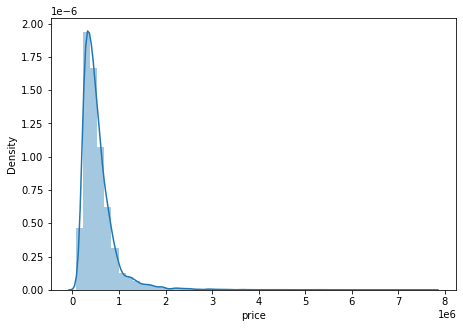

In [9]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
#plt.subplot(1,2,1)
#sns.distplot(['tprice'])
plt.subplot(1,2,2)
sns.distplot(train_data['price'])
plt.show()

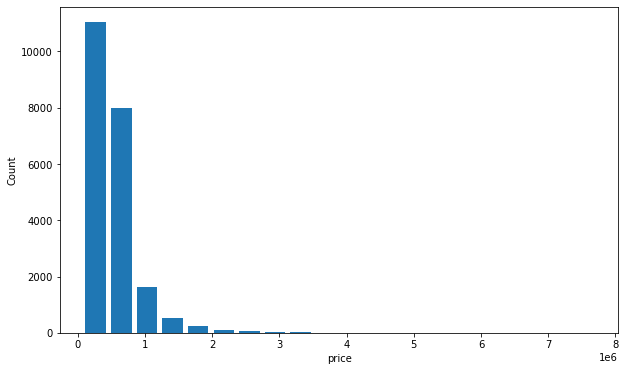

In [10]:

from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.hist(train_data.price, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

In [11]:
print("Highest allowed",train_data['price'].mean() + 3*train_data['price'].std())
print("Lowest allowed",train_data['price'].mean() - 3*train_data['price'].std())

Highest allowed 1641469.7312146286
Lowest allowed -561293.4476815696


In [12]:
train_data[(train_data['price'] > 8.80) | (train_data['price'] < 5.11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
new_df = train_data[(train_data['price'] < 8.80) & (train_data['price'] > 5.11)]
new_df




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [14]:
upper_limit = train_data['price'].mean() + 3*train_data['price'].std()
lower_limit = train_data['price'].mean() - 3*train_data['price'].std()

In [15]:
train_data['price'] = np.where(
    train_data['price']>upper_limit,
    upper_limit,
    np.where(
        train_data['price']<lower_limit,
        lower_limit,
        train_data['price']
    )
)

In [16]:
train_data['price'].describe()

count    2.161300e+04
mean     5.281591e+05
std      2.995273e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.641470e+06
Name: price, dtype: float64

In [17]:
print("Highest allowed",train_data['price'].mean() + 3*train_data['price'].std())
print("Lowest allowed",train_data['price'].mean() - 3*train_data['price'].std())

Highest allowed 1426741.0553275496
Lowest allowed -370422.79697627027


<AxesSubplot:xlabel='yr_built', ylabel='price'>

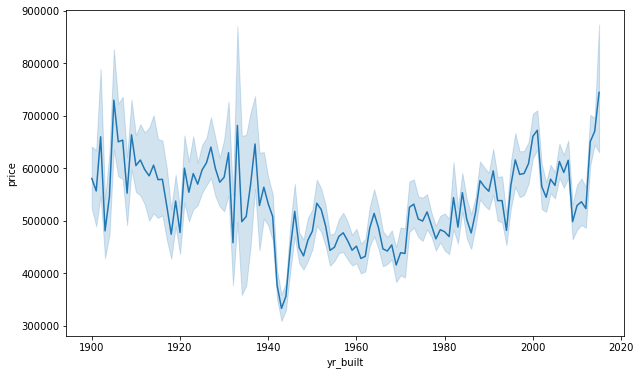

In [18]:
sns.lineplot(x='yr_built', y='price', data=train_data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

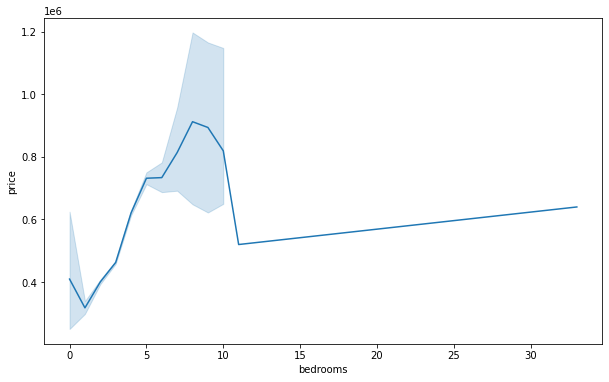

In [19]:
sns.lineplot(x='bedrooms', y='price', data=train_data)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

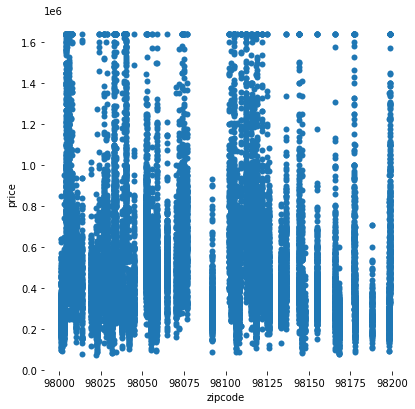

In [20]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="zipcode", y="price",
               
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                data=train_data, ax=ax)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

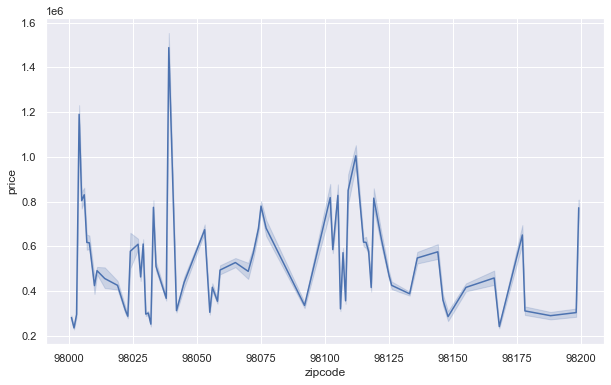

In [21]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="zipcode", y="price",
            
             data=train_data)

In [22]:
X = pd.get_dummies(data=train_data, drop_first=True)

In [23]:
s=(X.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [24]:
y=X.price
feature2=X.drop(['price'],axis=1)
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [25]:
train_data.shape

(21613, 21)

In [33]:
feature2.shape

(21613, 390)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(feature2,y,train_size=0.8,test_size=0.2, random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 390)
(4323, 390)
(17290,)
(4323,)


In [36]:

def mean(predict,y_test):
    mae=mean_absolute_error(predict,y_test)
    print('mean absolute error =',mae)


In [37]:

modelr = RandomForestRegressor(n_estimators=100,n_jobs=10,max_depth=100, random_state=1)
modelr.fit(X_train,y_train)
predict1=modelr.predict(X_test)
mean(predict1,y_test)

mean absolute error = 60797.28684943793


In [38]:

'''gnb = GaussianNB()
gnb.fit(X_train, y_train)
predict6=gnb.predict(X_test)
mean(predict6,y_test)'''

'gnb = GaussianNB()\ngnb.fit(X_train, y_train)\npredict6=gnb.predict(X_test)\nmean(predict6,y_test)'

In [39]:

model= XGBRFRegressor(n_estimators=50, max_depth=100,n_jobs=100)
model.fit(X_train,y_train)
predict=model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean(predict,y_test)


mean absolute error = 60647.46292157142


In [ ]:

bayes = linear_model.BayesianRidge(n_iter=30,
    tol=0.0001)
bayes.fit(X_train,y_train)
bay=bayes.predict(X_test)
mean(bay,y_test)